Вариант 7 Глазунов Даниил ПИ19-4

In [13]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint
import matplotlib.pyplot as plt

In [14]:
frac = lambda x: float(x.split('/')[0]) / float(x.split('/')[1]) if '/' in x else float(x)

In [15]:
a = 4
b = 12
c = 1/2

In [16]:
def F(xy):
    x, y = xy
    return -(x + a * y)

In [17]:
def Gr(xy):
    x, y = xy
    der = np.zeros_like(xy)
    der[0] = -1
    der[1] = -a
    return der

In [18]:
#Вводим ограничения
linear_constraints = [LinearConstraint([1, 2], -np.inf, 10),
                      LinearConstraint([3, 2], -np.inf, 18),
                      LinearConstraint([1, -1], -b, np.inf),
                      LinearConstraint([c, -1], -np.inf, 8*c + 3)]

x0 = np.array([1.0, 1.0])

#Здесь нужно максимизировать функцию, поэтому необходимо минимизировать обратную ей (-f). 
res = minimize(F, x0, jac=Gr, constraints=linear_constraints, options={'disp': True})
u = res.x[0]
v = res.x[1]
F_max = -res.fun
print(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -24.66666666666821
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 5
[-4.66666667  7.33333333]


In [19]:
print(f'Оптимальные значения: x = {u.round(3)}, y = {v.round(3)}')
print('Max значение функции:',F_max.round(3))

Оптимальные значения: x = -4.667, y = 7.333
Max значение функции: 24.667


In [23]:
# 2x2 <= 10-x1
y1 = (10-x)/2.0
# 2x2 <= 18-3x1 
y2 = (18-3*x)/2.0
# x2 <= x1+b
y3 = x+b
# x2 >= cx1-8c -3 
y4 = c*x-8*c-3
#F(x, y)/a - x/a
y5 = F_max/a - x/a
y6 = 4/a - x/a

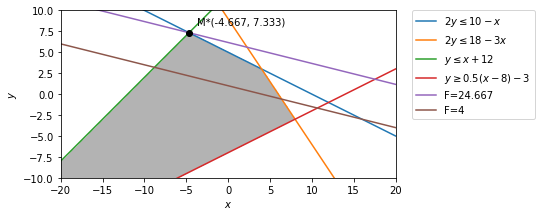

In [25]:
d = np.linspace(-20,20,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((2*y<=10-x) & (2*y<=18-3*x) & (y<=x+b) & (y>=c*x-8*c-3)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);
x = np.linspace(-20, 20, 2000)

plt.plot(x, y1, label=r'$2y\leq 10-x$')
plt.plot(x, y2, label=r'$2y\leq 18-3x$')
plt.plot(x, y3, label=fr'$y\leq x + {b}$')
plt.plot(x, y4, label=fr'$y\geq {c}(x-8)-3$')
plt.plot(x, y5, label=f'F={F_max.round(3)}')
plt.plot(x, y6, label='F=4')
plt.xlim(-20,20)
plt.ylim(-10,10)
plt.plot(u, v, 'ko')
plt.text(u + 1, v + 1, f'M*({u.round(3)}, {v.round(3)})')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()